# 3.1 MNIST

- MNIST : 70000개의 숫자 이미지 데이터셋. 분류 알고리즘 학습에 많이 사용됨

In [1]:
#download MNIST
import sklearn
import sklearn.datasets
from sklearn.datasets import fetch_openml # python3.0부터는 mldata가 아닌 openml을 사용
import numpy as np

mnist=fetch_openml('mnist_784',version=1,cache=True)

In [2]:
X, y = mnist['data'], mnist['target'] 

In [3]:
y = y.astype(np.uint8)

In [4]:
# array 파악
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

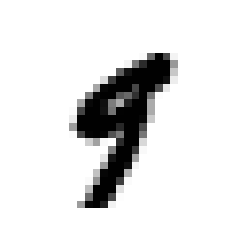

In [6]:
import matplotlib
import matplotlib.pyplot as plt

some_digit=X[36000]
some_digit_image=some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [7]:
y[36000]

9

In [8]:
X_train, X_test, y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [9]:
import numpy as np

shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

➔ 훈련 세트를 섞어서 모든 교차 검증 필드가 비슷해지게 함 (한 개의 fold에서도 특정 숫자가 누락되지 않게 해야 함)

# 3.2 이진 분류기 훈련

- 이진 분류기 ex) 5 분류기

In [10]:
# 타깃 벡터 생성
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(max_iter=5, random_state=42)

sgd_clf.fit(X_train, y_train_5)

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=5, random_state=42)

- [ SGDClassifier ] <br>
max_iter : The maximum number of passes over the training data.<br>
random_state : Used for shuffling the data, when shuffle is set to True. 

In [12]:
sgd_clf.predict([some_digit])

array([False])

# 3.3 성능 측정

## 3.3.1 교차 검증을 사용한 정확도 측정

* 교차 검증 구현

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=3, random_state=42)

for train_index,test_index in skfolds.split(X_train, y_train_5):
    print(train_index) # 각 fold의 train set
    print(test_index) # 각 fold의 test set
    clone_clf=clone(sgd_clf) #모델 복사
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_fold=X_train[test_index]
    y_test_fold=y_train_5[test_index]
    print 
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[19965 19966 19967 ... 59997 59998 59999]
[    0     1     2 ... 20393 20394 20407]


C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.9589
[    0     1     2 ... 59997 59998 59999]
[19965 19966 19967 ... 40004 40005 40006]


C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.96735
[    0     1     2 ... 40004 40005 40006]
[39893 39920 39944 ... 59997 59998 59999]


C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.9633


* cross_val_score() 함수로 fold가 3개인 Kfold 교차검증으로 SGD 평가<br>
➔ 훈련 set을 3개로 나누고 각 fold에 대해 예측 후 평가 위해 나머지들로 훈련시킨 모델 사용

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3, scoring='accuracy')

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.9589 , 0.96735, 0.9633 ])

In [15]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [16]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.9112 , 0.9078 , 0.90995])

## 3.3.2 오차 행렬

- 오차 행렬을 만들기 위해서 예측값 생성<br>
➔ test set은 분류 모델 완성 후 사용<br>
➔ 따라서 이 때는 cross_val_predict()로 예측

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


cross_val_predict는 평가점수가 아닌 각 test fold에서 얻은 예측값을 반환

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred) #오차 행렬 생성

array([[53897,   682],
       [ 1527,  3894]], dtype=int64)

In [19]:
y_train_perfect_predictions=y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions) #TP, TN만으로 만든 오차행렬

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## 3.3.3 정밀도와 재현률

- 오차 행렬의 성분<br>
1) 정밀도 : TP의 정확도 - TP/(TP+FP)<br>
2) 재현률=민감도=TPR : 분류기가 정확하게 감지한 TP의 비율 - TP/(TP+FN)<br>
3) F1 Score : 정밀도와 재현율의 조화평균 - 2×(정밀도×재현률)/(정밀도+재현률)

In [20]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) #정밀도

0.8509615384615384

In [21]:
recall_score(y_train_5, y_train_pred) # 재현률

0.7183176535694521

In [22]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7790337101130338

## 3.3.4 정밀도/재현율 트레이드오프

- SGD Classifier는 결정 함수를 이용해 각 샘플의 점수 계산<br>
➔ 임곗값보다 크고 작음으로 양성/음성을 구분하여 할당
<br><br>
- 사이킷런에서는 임곗값의 직접 지정은 불가능하나, 예측 점수는 확인 가능

In [23]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([-194083.76577521])

In [24]:
threshold=0
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

임곗값이 0보다 작으므로 False 반환

In [25]:
threshold=-250000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([ True])

임곗값이 0보다 크므로 True 반환

- 적절한 임곗값의 선정 방법<br>
➔ 훈련 세트의 모든 결정점수를 반환 후 임곗값에 대한 정밀도와 재현률 계산하여 판단

In [26]:
#결정점수 y_scores 반환
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5, cv=3, 
                           method='decision_function')

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [27]:
from sklearn.metrics import precision_recall_curve

precisions,recalls, thresholds=precision_recall_curve(y_train_5, y_scores)

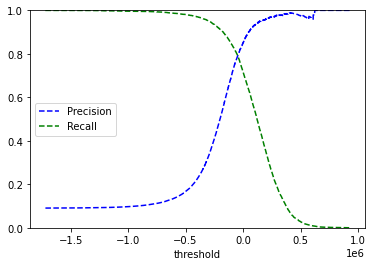

In [28]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label='Precision')
    plt.plot(thresholds,recalls[:-1],'g--',label='Recall')
    plt.xlabel('threshold')
    plt.legend(loc='center left')
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

- 정밀도 곡선이 울퉁불퉁한 이유 : <br>
➔ 임곗값을 올려도 정밀도가 낮아지는 경우가 있기 때문

(0.0, 1.0)

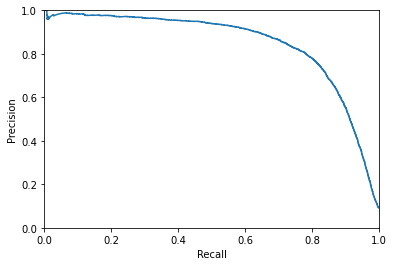

In [29]:
plt.plot(recalls[:-1],precisions[:-1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0,1])
plt.xlim([0,1])

In [30]:
#정밀도 90% 달성이 목표 시 임곗값은 약 0.2*10^6
y_train_pred_90=(y_scores>200000)
precision_score(y_train_5,y_train_pred_90)

0.9607942973523421

In [31]:
recall_score(y_train_5,y_train_pred_90)

0.34809075816270063

재현률이 너무 낮아 분류기가 유용하지 않은 상태

## 3.3.5 ROC 곡선

- ROC 곡선 : FPR(=1-TNR)에 대한 TPR의 곡선<br>
➔ ROC는 민감도에 대한 (1-특이도)의 그래프

In [32]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_train_5, y_scores)

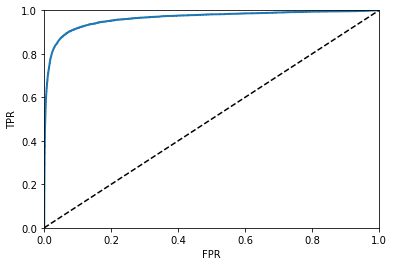

In [33]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
plot_roc_curve(fpr,tpr)
plt.show()

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9634486796400207

- RandomForestClassifier를 훈련시켜 SGDClassifier의 ROC AUC 점수 비교

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')

ROC Curve에 사용해야 하기 때문에 양성 클래스에 대한 확률을 점수로 사용

In [36]:
y_scores_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

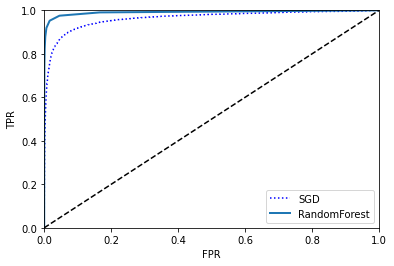

In [37]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'RandomForest')
plt.legend(loc='lower right')
plt.show()

In [38]:
roc_auc_score(y_train_5, y_scores_forest)

0.9913406492417236

# 3.4 다중 분류

 - SGD Classifier 적용

In [40]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([4], dtype=uint8)

- 각 클래스마다 분류시 산출된 점수 반환

In [41]:
some_digit_scores=sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-785425.55552966, -494378.7862733 , -653286.24859642,
        -172822.0563903 ,  -92323.1496536 , -183609.60873351,
        -724165.62712985, -273901.79268716, -257276.03263263,
        -163223.42772414]])

In [42]:
np.argmax(some_digit_scores) #가장 큰 index 반환

4

In [43]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [45]:
sgd_clf.classes_[4]

4